# matplotlib.pyplot.plot( )

`matplotlib` é uma biblioteca utilizada para a criação de gráficos e figuras, possuindo funções que permitem customizá-las de várias maneiras (como por exemplo alterando rótulos dos eixos, cores etc.).

O módulo `pyplot` é uma interface de criação de gráficos baseada no `matplotlib`, e possui grande interação com o módulo `numpy` de criação de arrays diversos. 

A sua integração com a biblioteca `pandas` se dá por meio do método `.plot()`, que permite a criação de gráficos rápidos a partir de objetos das classes `Series` e `DataFrame` com o layout padrão do MATLAB.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Importando DataFrame que contém apuração diária dos casos de COVID na Califórnia
df = pd.read_csv("../dados/ca-covid.csv")
df.drop(df.columns[0], axis = 1, inplace = True)
df.drop("state", axis = 1, inplace = True)
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%y")
df['month'] = df['date'].dt.month
df.set_index("date", inplace = True)
df.head()

,cases,deaths,month
date,,,
2020-01-25,1,0,1
2020-01-26,1,0,1
2020-01-27,0,0,1
2020-01-28,0,0,1
2020-01-29,0,0,1


### Line Plot

Uma única linha

<AxesSubplot:title={'center':'Casos de COVID em Dezembro na Califórnia'}, xlabel='date'>

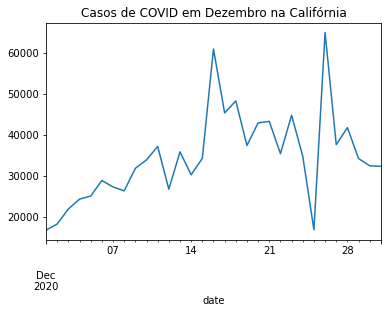

In [32]:
df[df['month'] == 12]['cases'].plot(kind = "line", title = "Casos de COVID em Dezembro na Califórnia")

Duas ou mais linhas sobrepostas

<AxesSubplot:title={'center':'Casos e mortes por COVID em Dezembro na Califórnia'}, xlabel='date'>

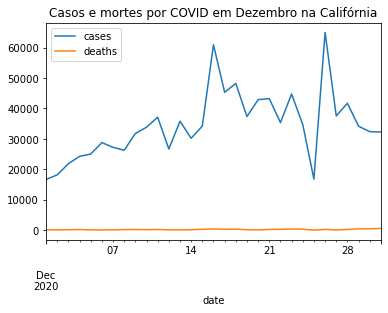

In [31]:
df[df['month']==12][['cases', 'deaths']].plot(kind = "line", title = "Casos e mortes por COVID em Dezembro na Califórnia")

### Bar Plot

Vertical

<AxesSubplot:title={'center':'Casos e mortes de COVID por Mês na Califórnia'}, xlabel='month'>

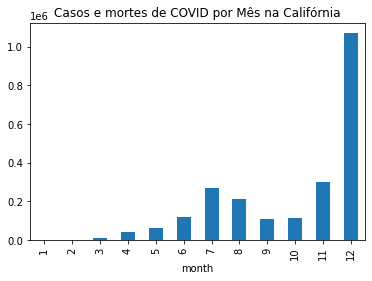

In [43]:
df.groupby('month')['cases'].sum().plot(kind = "bar", title = "Casos e mortes de COVID por Mês na Califórnia")

Horizontal

<AxesSubplot:title={'center':'Casos e mortes de COVID por Mês na Califórnia'}, ylabel='month'>

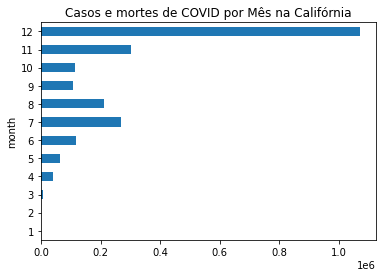

In [44]:
df.groupby('month')['cases'].sum().plot(kind = "barh", title = "Casos e mortes de COVID por Mês na Califórnia")

Vertical com duas ou mais barras por observação

<AxesSubplot:title={'center':'Casos e mortes de COVID por Mês na Califórnia'}, xlabel='month'>

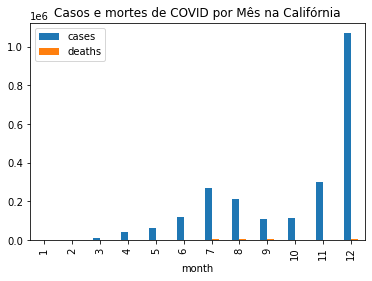

In [42]:
df.groupby('month')[['cases', "deaths"]].sum().plot(kind = "bar", stacked = False, title = "Casos e mortes de COVID por Mês na Califórnia")

Vertical com barras empilhadas

<AxesSubplot:title={'center':'Casos e mortes de COVID por Mês na Califórnia'}, xlabel='month'>

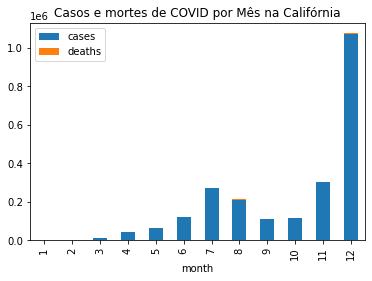

In [41]:
df.groupby('month')[['cases', "deaths"]].sum().plot(kind = "bar", stacked = True, title = "Casos e mortes de COVID por Mês na Califórnia")

### Box-plot

Estrutura de um Box-Plot:

* pontos -> outliers
* linha conectada ao topo da caixa -> máximo (excluindo outliers)
* topo da caixa -> 3º quartil
* linha do meio da caixa -> mediana (2º quartil)
* base da caixa -> 1º quartil
* linha conectada à base da caixa -> mínimo (excluindo outliers)

<AxesSubplot:title={'center':'Casos de COVID em Junho'}>

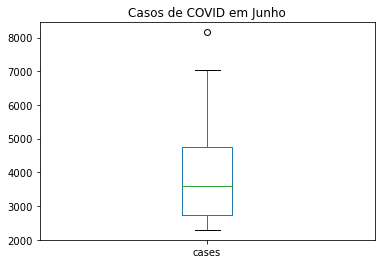

In [46]:
df[df["month"]==6]["cases"].plot(kind="box", title = "Casos de COVID em Junho")

### Histogram

<AxesSubplot:ylabel='Frequency'>

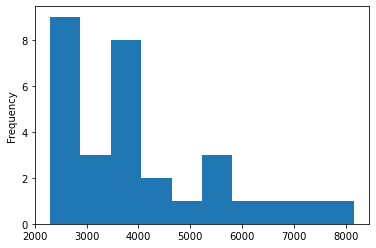

In [50]:
df[df["month"]==6]["cases"].plot(kind="hist", bins = 10) 

### Area Plot

Com sobreposição

<AxesSubplot:xlabel='date'>

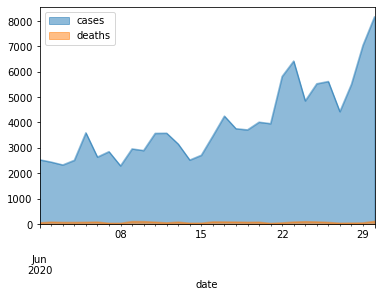

In [51]:
df[df["month"]==6][["cases", "deaths"]].plot(kind="area", stacked=False)

Sem Sobreposição

<AxesSubplot:xlabel='date'>

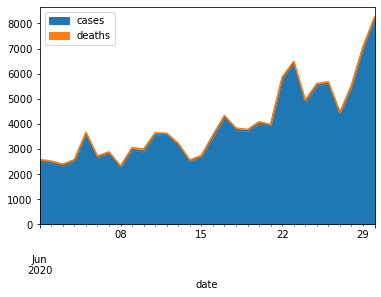

In [52]:
df[df["month"]==6][["cases", "deaths"]].plot(kind="area", stacked=True)

### Scatter Plot

<AxesSubplot:xlabel='cases', ylabel='deaths'>

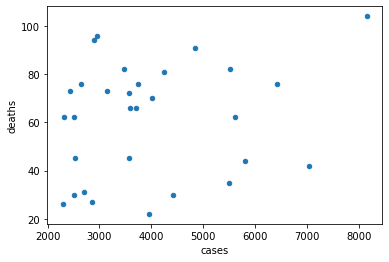

In [53]:
df[df["month"]==6][["cases", "deaths"]].plot(kind="scatter", x='cases', y='deaths')

### Pie Chart

<AxesSubplot:ylabel='cases'>

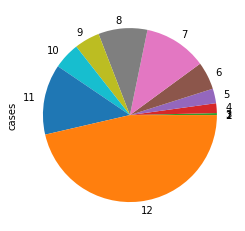

In [54]:
df.groupby('month')['cases'].sum().plot(kind="pie")

### Argumentos para Formatação

<AxesSubplot:xlabel='Mês', ylabel='Ocorrências'>

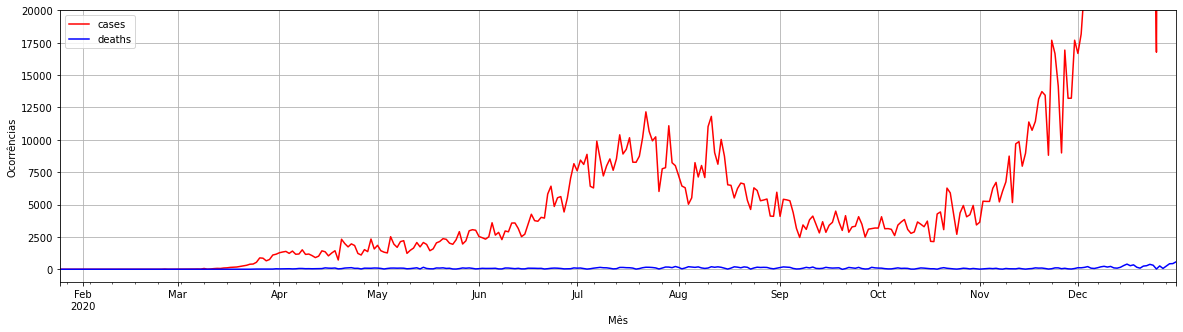

In [79]:
df[['cases', 'deaths']].plot(kind = "line",
                             legend = True,
                             xlabel = "Mês",
                             ylabel = "Ocorrências",
                             ylim = (-1000,20000),
                             grid = True,
                             figsize = (20, 5),
                             use_index = True,
                             color = ["red", "blue"]
                             )

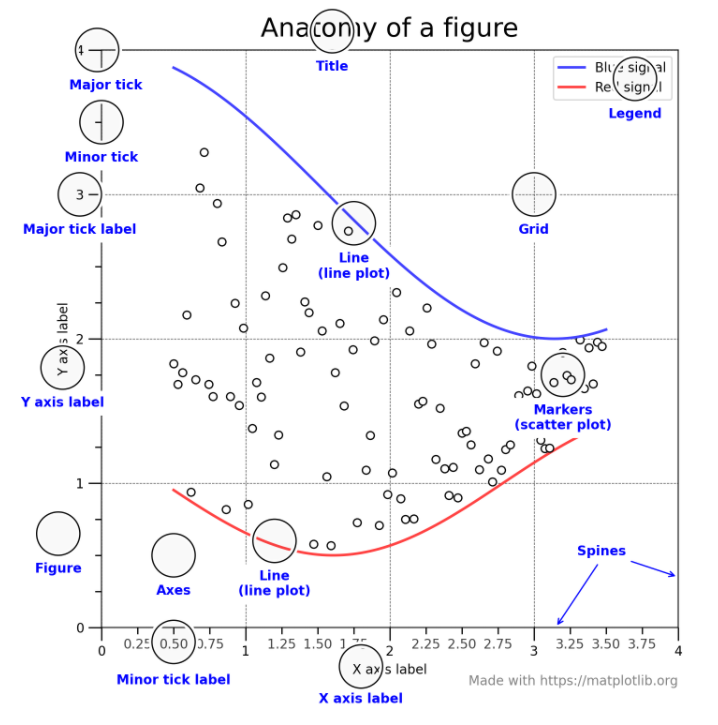